# Some trails :

In [17]:
import re
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
#tools
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator
#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#Metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, make_scorer

In [18]:
all_data = pd.read_csv("train_ml.csv", index_col=0)

all_data_final = pd.read_csv("test_ml.csv", index_col=0)

In [19]:
all_data

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,47.0,25556,0,1,0,0,0,0,0,1
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,46.0,19930,1,1,0,0,0,0,0,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,21.0,4,0,1,0,0,0,0,0,1
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,52.0,96568,0,0,1,0,0,0,0,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,81.0,95131,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39666,"Tue, 08 Oct 2019 18:58:39 +0000",mp1,tripadvisor.com,0,0,text/html,11,31,0,0,32.0,44952,0,0,1,0,0,0,0,0
39667,03 Apr 2018 16:07:48 +0530,NaN,NaN,0,0,text/plain,0,0,0,0,57.0,721,1,1,0,0,0,0,0,0
39668,"Mon, 3 Apr 2017 18:55:47 +0530",iiitd,ac.in,0,0,multipart/alternative,0,0,1,0,28.0,571,0,1,0,1,0,0,0,0
39669,"Thu, 14 Jun 2018 00:46:51 +0000",m,mail.coursera.org,0,0,multipart/alternative,27,136,1,1,24.0,92847,1,1,0,0,0,0,0,0


### Date formatting

In [20]:
def format_date(row):
    pattern = r'(\d{1,2}.*\d{2}:\d{2}:\d{2}) ([+-]\d{2}\d{2})'
    
    ans = re.search(pattern, string=row)
    
    if ans:
        if ans.group(1)[1] == ' ':
            return ''.join(['0', ans.group(1), ans.group(2)])
        else:
            return ''.join([ans.group(1), ans.group(2)])
    else:
        return "1900-01-01 15:00:00+0000"

#The for loops are slow :

all_data['date'] = pd.to_datetime(all_data['date'].apply(format_date))
tmp_1 = []
tmp_2 = []
tmp_3 = []
tmp_4 = []
tmp_5 = []
tmp_6 = []

for d in all_data['date']:
    tmp_1.append(d.strftime("%w"))
    tmp_2.append(d.strftime("%H"))
    tmp_3.append(d.strftime("%m"))
    tmp_4.append(d.strftime("%y"))
    tmp_5.append(d.strftime("%z"))
    tmp_6.append(d.strftime("%d"))

all_data['date_dayweek'] = tmp_1
all_data['date_hour'] = tmp_2
all_data['date_month'] = tmp_3
all_data['date_year'] = tmp_4
all_data['date_timezone'] = tmp_5
all_data['date_daymonth'] = tmp_6

#Test data

all_data_final['date'] = pd.to_datetime(all_data_final['date'].apply(format_date))
tmp_1 = []
tmp_2 = []
tmp_3 = []
tmp_4 = []
tmp_5 = []
tmp_6 = []
for d in all_data_final['date']:
    tmp_1.append(d.strftime("%w"))
    tmp_2.append(d.strftime("%H"))
    tmp_3.append(d.strftime("%m"))
    tmp_4.append(d.strftime("%y"))
    tmp_5.append(d.strftime("%z"))
    tmp_6.append(d.strftime("%d"))
    
all_data_final['date_dayweek'] = tmp_1
all_data_final['date_hour'] = tmp_2
all_data_final['date_month'] = tmp_3
all_data_final['date_year'] = tmp_4
all_data_final['date_timezone'] = tmp_5
all_data_final['date_daymonth'] = tmp_6

In [21]:
all_data['date_timezone'].nunique()

22

In [22]:
all_data

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,...,purchases,travel,spam,social,date_dayweek,date_hour,date_month,date_year,date_timezone,date_daymonth
0,2018-10-15 08:03:09+00:00,researchgatemail,net,0,0,multipart/alternative,4,28,0,1,...,0,0,0,1,1,08,10,18,+0000,15
1,2014-04-17 09:12:33-07:00,no-ip,com,0,0,multipart/alternative,6,32,0,0,...,0,0,0,0,4,09,04,14,-0700,17
2,2016-10-27 01:36:28+00:00,mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,...,0,0,0,1,4,01,10,16,+0000,27
3,2020-10-16 08:06:31+00:00,insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,...,0,0,0,0,5,08,10,20,+0000,16
4,2015-07-02 10:16:46+00:00,twitter,com,0,0,multipart/alternative,20,166,0,0,...,0,0,0,1,4,10,07,15,+0000,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39666,2019-10-08 18:58:39+00:00,mp1,tripadvisor.com,0,0,text/html,11,31,0,0,...,0,0,0,0,2,18,10,19,+0000,08
39667,2018-04-03 16:07:48+05:30,NaN,NaN,0,0,text/plain,0,0,0,0,...,0,0,0,0,2,16,04,18,+0530,03
39668,2017-04-03 18:55:47+05:30,iiitd,ac.in,0,0,multipart/alternative,0,0,1,0,...,0,0,0,0,1,18,04,17,+0530,03
39669,2018-06-14 00:46:51+00:00,m,mail.coursera.org,0,0,multipart/alternative,27,136,1,1,...,0,0,0,0,4,00,06,18,+0000,14


### Lets create more features :

In [23]:
all_data["sub/body"] = all_data.chars_in_subject / all_data.chars_in_body
all_data["urls/body"] = all_data.urls/all_data.chars_in_body
all_data["images/body"] = all_data.images/all_data.chars_in_body
all_data["salutaions&designation"] = all_data.salutations*all_data.designation

all_data_final["sub/body"] = all_data_final.chars_in_subject / all_data_final.chars_in_body
all_data_final["urls/body"] = all_data_final.urls/all_data_final.chars_in_body
all_data_final["images/body"] = all_data_final.images/all_data_final.chars_in_body
all_data_final["salutaions&designation"] = all_data_final.salutations*all_data_final.designation


#Ordering columns
n_added_columns = 4
cols = all_data.columns.tolist()
all_data = all_data[cols[-n_added_columns:] + cols[:-n_added_columns]]

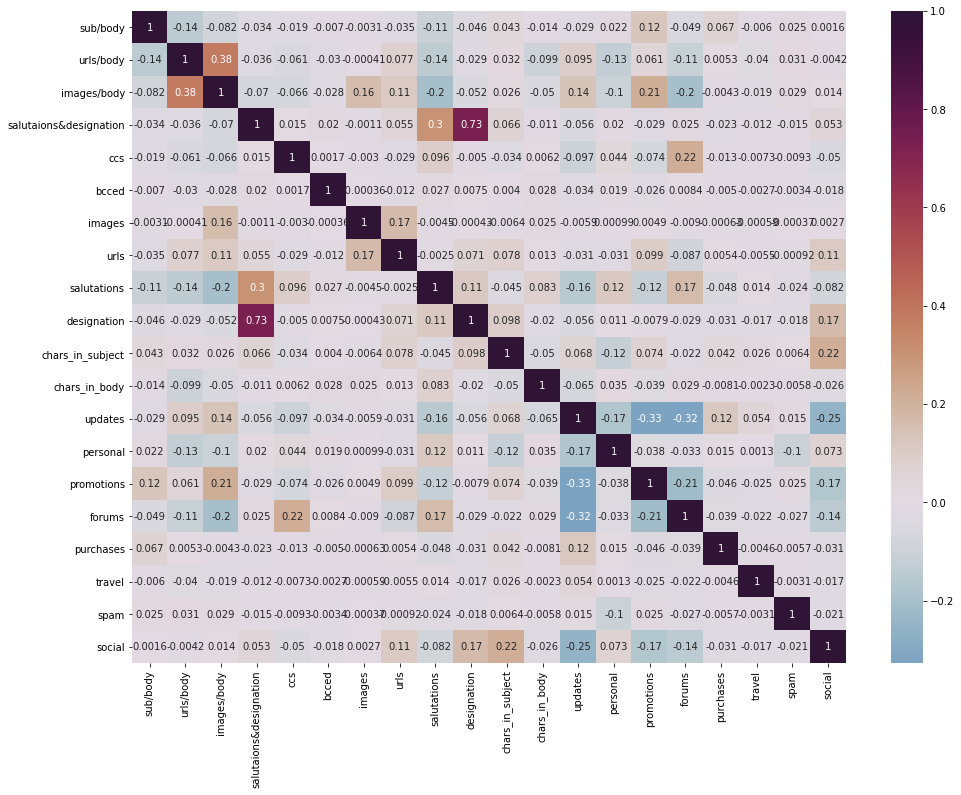

In [24]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(all_data.corr(),cmap = "twilight_shifted", annot=True, ax=ax, center=0)

### String formatting and encoding

For training data

In [25]:
all_data.mail_type = all_data.mail_type.fillna(value="")

multipart = []
alternative = []
text = []
mixed = []
signed = []
html = []
plain = []
calendar = []
related = []
report = []

for type in all_data.mail_type.values :
    multipart.append( "multipart" in type.lower())
    alternative.append( "alternative" in type.lower())
    text.append( "text" in type.lower())
    mixed.append( "mixed" in type.lower())
    signed.append( "signed" in type.lower())
    html.append( "html" in type.lower())
    plain.append( "plain" in type.lower())
    calendar.append( "calendar" in type.lower())
    related.append( "related" in type.lower())
    report.append( "report" in type.lower())

#Encoding
all_data["multipart"] = multipart
all_data["alternative"] = alternative
all_data["text"] = text
all_data["mixed"] = mixed
all_data["signed"] = signed
all_data["html"] = html
all_data["plain"] = plain
all_data["calendar"] = calendar
all_data["related"] = related
all_data["report"] = report

'''
np.unique(all_data.mail_type.values)

==> array(['', 'Multipart/Alternative', 'Multipart/Mixed', 'Text/Html',
       'multipart/IDM', 'multipart/alternative', 'multipart/mixed',
       'multipart/related', 'multipart/report', 'multipart/signed',
       'text/HTML', 'text/calendar', 'text/html', 'text/html ',
       'text/plain'], dtype=object)
'''

#Free some memory 
multipart, alternative, text, mixed, signed, html, plain, calendar, related, report = 0,0,0,0,0,0,0,0,0,0

For test data

In [26]:
all_data_final.mail_type = all_data_final.mail_type.fillna(value="")

multipart = []
alternative = []
text = []
mixed = []
signed = []
html = []
plain = []
calendar = []
related = []
report = []

for type in all_data_final.mail_type.values :
    multipart.append( "multipart" in type.lower())
    alternative.append( "alternative" in type.lower())
    text.append( "text" in type.lower())
    mixed.append( "mixed" in type.lower())
    signed.append( "signed" in type.lower())
    html.append( "html" in type.lower())
    plain.append( "plain" in type.lower())
    calendar.append( "calendar" in type.lower())
    related.append( "related" in type.lower())
    report.append( "report" in type.lower())

#Encoding
all_data_final["multipart"] = multipart
all_data_final["alternative"] = alternative
all_data_final["text"] = text
all_data_final["mixed"] = mixed
all_data_final["signed"] = signed
all_data_final["html"] = html
all_data_final["plain"] = plain
all_data_final["calendar"] = calendar
all_data_final["related"] = related
all_data_final["report"] = report

"""
np.unique(all_data_final.mail_type.values)

==> array(['', 'Multipart/Mixed', 'Text/Html', 'multipart/alternative',
       'multipart/mixed', 'multipart/related', 'multipart/report',
       'multipart/signed', 'text/html', 'text/html ', 'text/plain'],
      dtype=object)
"""

#Free some memory 
multipart, alternative, text, mixed, signed, html, plain, calendar, related, report = 0,0,0,0,0,0,0,0,0,0

In [27]:
all_data.head(10)

,sub/body,urls/body,images/body,salutaions&designation,date,org,tld,ccs,bcced,mail_type,...,multipart,alternative,text,mixed,signed,html,plain,calendar,related,report
0,0.001839,0.001096,0.000157,0,2018-10-15 08:03:09+00:00,researchgatemail,net,0,0,multipart/alternative,...,True,True,False,False,False,False,False,False,False,False
1,0.002308,0.001606,0.000301,0,2014-04-17 09:12:33-07:00,no-ip,com,0,0,multipart/alternative,...,True,True,False,False,False,False,False,False,False,False
2,5.250000,0.000000,0.000000,0,2016-10-27 01:36:28+00:00,mail,goodreads.com,0,0,multipart/mixed,...,True,False,False,True,False,False,False,False,False,False
3,0.000538,0.001771,0.001118,0,2020-10-16 08:06:31+00:00,insideapple,apple.com,0,0,multipart/alternative,...,True,True,False,False,False,False,False,False,False,False
4,0.000851,0.001745,0.000210,0,2015-07-02 10:16:46+00:00,twitter,com,0,0,multipart/alternative,...,True,True,False,False,False,False,False,False,False,False
5,0.000392,0.000452,0.000121,0,2015-06-30 12:32:11+00:00,hackerrank,com,0,0,multipart/alternative,...,True,True,False,False,False,False,False,False,False,False
6,0.001175,0.000587,0.000000,0,2018-06-06 14:03:02+05:30,staqu,com,3,0,multipart/alternative,...,True,True,False,False,False,False,False,False,False,False
7,0.002531,0.002151,0.000380,0,2018-12-07 19:10:10+05:30,statebankrewardz,com,0,0,text/html,...,False,False,True,False,False,True,False,False,False,False
8,0.000078,0.000000,0.000000,0,2018-03-29 12:57:37+00:00,non,schneider-electric.com,0,0,multipart/related,...,True,False,False,False,False,False,False,False,True,False
9,0.004966,0.002483,0.000146,0,2014-08-20 09:28:42-04:00,khanacademy,org,0,0,multipart/alternative,...,True,True,False,False,False,False,False,False,False,False


##### TLD cleaning

In [28]:
#We will use a dictionary counting the number of occurance of each tld name
tlds = {}
MINIMAL_REPEAT_TLDS = 5
all_data.tld = all_data.tld.apply(str)
for word in all_data.tld :
    processed = word.lower().strip().split('.')
    for w in processed :
        try :
            tlds[w] += 1
        except: #w is not yet in the dictionary 
            tlds[w] = 1
#del(tlds["nan"]) #will we also classify "nan" data ? this might be searched in the future



#Training

#This might be searched more concerning the value of MINIMAL_REPEATED
tlds_columns = { 'tld_'+word : [0]*len(all_data)     for word in filter(lambda x: tlds[x]>=MINIMAL_REPEAT_TLDS ,tlds)}  #This will create a dictionnary of lists, each key correspond to a word
tlds_columns["tld_depth"] = [0]*len(all_data)

#Now we will create the columns in all data, we will do an encoding
for i,tld in enumerate(all_data.tld) :
    tlds_columns["tld_depth"][i] = tld.count(".")
    for word in tlds_columns.keys() :
        if word in tld.lower():
            tlds_columns[word][i] = 1
#Columns creation
all_data[list(tlds_columns.keys())] = np.array(list(tlds_columns.values())).transpose()



#Test
all_data_final.tld = all_data_final.tld.apply(str)
tlds_columns = { 'tld_'+word : [0]*len(all_data_final)     for word in filter(lambda x: tlds[x]>=MINIMAL_REPEAT_TLDS ,tlds)}  #This will create a dictionnary of lists, each key correspond to a word
tlds_columns["tld_depth"] = [0]*len(all_data_final)

for i,tld in enumerate(all_data_final.tld) :
    tlds_columns["tld_depth"][i] = tld.count(".")
    for word in tlds_columns.keys() :
        if word in tld.lower():
            tlds_columns[word][i] = 1
#Columns creation
all_data_final[list(tlds_columns.keys())] = np.array(list(tlds_columns.values())).transpose()


#Free some memory
tlds = 0
tlds_columns = 0

KeyError: "None of [Index(['tld_net', 'tld_com', 'tld_goodreads', 'tld_apple',\n       'tld_schneider-electric', 'tld_org', 'tld_ac', 'tld_in', 'tld_fr',\n       'tld_jp',\n       ...\n       'tld_news', 'tld_eservices-laposte', 'tld_digitalglobe', 'tld_amazon',\n       'tld_quikr', 'tld_tata-sky', 'tld_godaddy', 'tld_l3harris',\n       'tld_zendesk', 'tld_depth'],\n      dtype='object', length=131)] are in the [columns]"

In [ ]:
all_data.head(10)

##### ORG cleaning

In [ ]:
# This dictionnary will count the number of times we have repeated stuff
orgs = {}
MINIMAL_REPEAT_ORGS = 1
all_data.org = all_data.org.apply(lambda x: ''.join(l for l in str(x) if l not in '-_ ' ).lower())

for org in all_data.org :
    try:
        orgs[org] += 1
    except:
        orgs[org] = 1


In [ ]:
sum(all_data.personal)

In [ ]:
filter(lambda x: orgs[x]>)

# Here you should do an approriat encoding


### Creating and encoding X and y vectors :

In [ ]:
#Categorical Data
attributes = ['org','tld','mail_type','date','date_hour'] #Categorical data
cat_data_final =  all_data_final[attributes].fillna(value="None")
cat_data = all_data[attributes].fillna(value='None')

#Training and Testing
X = all_data[['ccs','bcced','images','urls','salutations','designation','chars_in_subject','chars_in_body','sub/body','urls/body','images/body']]

    #Data cleaning
X = X.fillna(value=0)

    #Encode other data
enc = OneHotEncoder(sparse=0, handle_unknown='ignore')
for att in attributes:
    enc.fit( cat_data[att].values.reshape(-1,1)[::10] ) #Fit

    X_tmp_enc = enc.transform( cat_data[att].values.reshape(-1,1) ) #Encoded data
    pd_X_tmp_enc = pd.DataFrame(X_tmp_enc, columns= [att +"_" + category for category in enc.categories_[0]]) 

    X = pd.concat([pd_X_tmp_enc, X], axis=1)

y = all_data[['updates','personal','promotions','forums','purchases','travel','spam','social']]



#Predicting
X_final = all_data_final[['ccs','bcced','images','urls','salutations','designation','chars_in_subject','chars_in_body','sub/body','urls/body','images/body']]

    #Data cleaning
X_final = X_final.fillna(value=0)
    #Encode other data
for att in attributes:
    enc.fit( cat_data[att].values.reshape(-1,1)[::10] ) #Fit
    X_tmp_enc = enc.transform( cat_data_final[att].values.reshape(-1,1) ) #Encoding data
    pd_X_tmp_enc = pd.DataFrame(X_tmp_enc, columns= [att +"_" + category for category in enc.categories_[0]]) 

    X_final = pd.concat([pd_X_tmp_enc, X_final], axis=1)



In [ ]:
X.shape

In [ ]:
X.

### Classification :

In [49]:
N_SAMPLE = X.shape[0]
x_train, x_test, y_train, y_test = train_test_split(X.head(N_SAMPLE), y.head(N_SAMPLE), test_size=0.1, stratify=y.head(N_SAMPLE))

In [50]:
labels = ['updates', 'personal', 'promotions','forums', 'purchases', 'travel','spam', 'social']
grids = []
loss = []

for label in labels:
    print("For : " +label+" ...")
    #grid_params = {'base_estimator' : [DecisionTreeClassifier(max_depth=i) for i in [3,4,5]], 'n_estimators': range(20,201,30)}
    #grid_params = {'C':np.logspace(-1,1,3), 'gamma': np.logspace(2,4,3)}
    #grid_params = {'base_estimator' : [MLPClassifier(hidden_layer_sizes=[i,j,z],max_iter=20) for i in [20,40] for j in [10,20] for z in [10,20] ], 'n_estimators': range(20,81,30)}
    grid_params = {'n_estimators': range(60,181,20), 'criterion': ['entropy']}
    grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_params, cv=3, verbose=1, scoring=make_scorer(log_loss,greater_is_better=0), n_jobs=4, return_train_score=True, refit=True)
    grid.fit(x_train, y_train[label])

    print("Best classifier : ", grid.best_estimator_ )
    print(classification_report(y_test[label], grid.best_estimator_.predict(x_test)))
    loss.append(log_loss(y_test[label], grid.best_estimator_.predict_proba(x_test)))
    print(loss[-1])
    grids.append(grid)
print("\n \nMean loss = ",np.mean(loss))

For : updates ...
Fitting 3 folds for each of 14 candidates, totalling 42 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 out of  42 | elapsed:  6.4min finished
Best classifier :  RandomForestClassifier(n_estimators=160)
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2530
           1       0.92      0.92      0.92      1438

    accuracy                           0.94      3968
   macro avg       0.93      0.93      0.93      3968
weighted avg       0.94      0.94      0.94      3968

0.1897930723377197
For : personal ...
Fitting 3 folds for each of 14 candidates, totalling 42 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 out of  42 | elapsed:  6.5min finished
Best classifier :  RandomForestClassifier(n_estimators=160)
              precision    recall  f1-score   support

           0       0.92      0

In [51]:
grids[4].best_estimator_

RandomForestClassifier(criterion='entropy')

### Predictions :

In [52]:
L = 0
for i in range(8):
    L+= log_loss(y_test[labels[i]], grids[i].best_estimator_.predict_proba(x_test)[:,1])
L/8

0.08890773771768544

In [53]:
predictions = pd.DataFrame()
for i,label in enumerate(labels):
    predictions[label] = grids[i].best_estimator_.predict_proba(X_final)[:,1]

predictions.to_csv("RForest_sample_submission_ml.csv", index=True, index_label='Id')